### 데이터
Downloaded from: https://github.com/hyerica-bdml/class-2020-bigdata/tree/master/W02

### 문제
* 주어진 샘플 개수에 대해 Simple random sampling과 Stratified sampling을 통해 각각 100번씩 average distance를 추정하고 샘플 평균과 샘플 평균의 분산을 계산하는 Python 코드를 작성하시오.
* 샘플 개수를 1000, 2000, 4000, 8000, 16000개로 증가시키면서 두 샘플 방식의 샘플 평균 분산을 그래프로 그리시오 (matplotlib 사용)

### 제출
* 모든 코드와 그래프를 담고 있는 Jupyter Notebook 파일 (.ipynb)

In [1]:
import math

def dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [2]:
with open("1000000.txt", "r") as f:
    point_lines = f.readlines()
    point_list = list()
    for line in point_lines:
        t = line.strip().split(',')
        point_list.append((float(t[1]), float(t[2])))

In [3]:
n_points = len(point_list)

In [4]:
n_points

1000000

In [5]:
test_n_samples = [ 1000, 2000, 4000, 8000, 16000 ]

# Simple Random Sampling

In [6]:
import random
import matplotlib.pyplot as plt 

def sample_pair_self(n_points):
    p = random.randrange(0, n_points)
    while True:
        q = random.randrange(0, n_points)
        if q is not p:
            break
    return (p, q)

def srs_average_dist_self(n_points, point_list, n_samples):
    if n_samples == 0:
        return 0
    sum = 0.;
    for _ in range(n_samples):
        p, q = sample_pair_self(n_points)
        sum += dist(point_list[p][0], point_list[p][1], point_list[q][0], point_list[q][1])
    return sum / float(n_samples)

def sample_pair(n_points1, n_points2):
    return (random.randrange(0, n_points1), random.randrange(0, n_points2))

def srs_average_dist(n_points1, point_list1, n_points2, point_list2, n_samples):
    if n_samples == 0:
        return 0
    sum = 0.;
    for _ in range(n_samples):
        p, q = sample_pair(n_points1, n_points2)
        sum += dist(point_list1[p][0], point_list1[p][1], point_list2[q][0], point_list2[q][1])
    return sum / float(n_samples)

def variance_of_sample_means(sample_means):
    m = sum(sample_means) / len(sample_means)
    sse = sum([ (v - m)**2 for v in sample_means ])
    return sse / (len(sample_means) - 1)

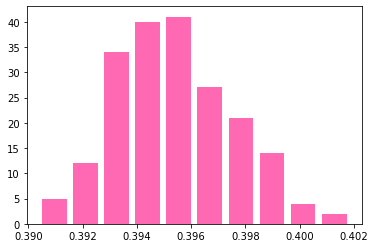

In [7]:
values = [ srs_average_dist_self(n_points, point_list, 10000) for _ in range(200) ]
plt.hist(values, bins=10, cumulative=False, histtype='bar', orientation='vertical', rwidth=0.8,color='hotpink')
plt.show()

In [8]:
res_srs = list()
for n_samples in test_n_samples:
    values = [ srs_average_dist_self(n_points, point_list, n_samples) for _ in range(200) ]
    var = variance_of_sample_means(values)
    res_srs.append(var)

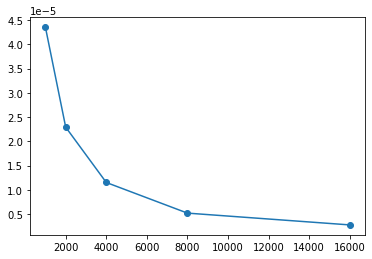

In [9]:
plt.plot( test_n_samples, res_srs, linestyle='-', marker='o')
plt.show()

# Stratified Sampling

In [10]:
with open('1000000.grid', 'r') as grid_file:
    grid_lines = grid_file.readlines() 
    grid_x = [ float(v) for v in grid_lines[0].strip().split(",") ]
    grid_y = [ float(v) for v in grid_lines[1].strip().split(",") ]
    
    # number of points in each grid unit
    grid_size = [ int(v) for v in grid_lines[2].strip().split(",") ]

In [11]:
grid_size

[224531,
 153663,
 71994,
 23101,
 153501,
 106050,
 49407,
 15857,
 72541,
 49307,
 23308,
 7701,
 23268,
 15864,
 7511,
 2396]

### Compute strata size and ratio to population size

In [12]:
population_size = n_points * (n_points - 1) / 2

# ratio to population size
strata_ratio = [ 
    [ float(s * t) / float(population_size) if i < j else 0 for j, s in enumerate(grid_size) ]
    for i, t in enumerate(grid_size)
]
for i, s in enumerate(grid_size):
    strata_ratio[i][i] = float(s * (s-1) / 2) / float(population_size)

In [13]:
population_size

499999500000.0

In [14]:
# flatten
flatten_strata_ratio = [ v for row in strata_ratio for v in row ]
# flatten_strata_sample_size = [ v*1000000 for v in flatten_strata_ratio  ]
# print(flatten_strata_sample_size)


### Sample point IDs from each grid unit

1.

With each grid ID i,
* For $S_{ij}$ with all $j \geq i$, sample <code>strata_sample_size[i][j]</code> point IDs from $G_i$ and $G_j$ respectively

2.

Make pairs of points each of which comes from different grid units

3.

With every pair,
* compute distance (refer to broadcast data)
* output distance with strata ID as key

4.

Compute average with each stratum

In [15]:
grid_group = [ list() for _ in range(len(grid_size)) ]
# print(grid_group)


with open("1000000.txt", "r") as f:
    point_lines = f.readlines()
    for line in point_lines:
        t = line.strip().split(',')
        point = (float(t[1]), float(t[2]))
        if point[0]<0.25 and point[1]<0.25:
            grid_group[0].append(point)
        elif point[0]<0.5 and point[1]<0.25:
            grid_group[1].append(point)
        elif point[0]<0.75 and point[1]<0.25:
            grid_group[2].append(point)
        elif point[0]<1 and point[1]<0.25:
            grid_group[3].append(point)
        elif point[0]<0.25 and point[1]<0.5:
            grid_group[4].append(point)
        elif point[0]<0.5 and point[1]<0.5:
            grid_group[5].append(point)
        elif point[0]<0.75 and point[1]<0.5:
            grid_group[6].append(point)
        elif point[0]<1 and point[1]<0.5:
            grid_group[7].append(point)
        elif point[0]<0.25 and point[1]<0.75:
            grid_group[8].append(point)
        elif point[0]<0.5 and point[1]<0.75:
            grid_group[9].append(point)
        elif point[0]<0.75 and point[1]<0.75:
            grid_group[10].append(point)
        elif point[0]<1 and point[1]<0.75:
            grid_group[11].append(point)
        elif point[0]<0.25 and point[1]<1:
            grid_group[12].append(point)    
        elif point[0]<0.5 and point[1]<1:
            grid_group[13].append(point)    
        elif point[0]<0.75 and point[1]<1:
            grid_group[14].append(point)
        elif point[0]<1 and point[1]<1:
            grid_group[15].append(point)


# check size
for i, l in enumerate(grid_group):
    assert grid_size[i] == len(l)

In [16]:
# def srs_average_dist_self(n_points, point_list, n_samples):
#     if n_samples == 0:
#         return 0
#     sum = 0.;
#     for _ in range(n_samples):
#         p, q = sample_pair_self(n_points)
#         sum += dist(point_list[p][0], point_list[p][1], point_list[q][0], point_list[q][1])
#     return sum / float(n_samples)

# def srs_average_dist(n_points1, point_list1, n_points2, point_list2, n_samples):
#     if n_samples == 0:
#         return 0
#     sum = 0.;
#     for _ in range(n_samples):
#         p, q = sample_pair(n_points1, n_points2)
#         sum += dist(point_list1[p][0], point_list1[p][1], point_list2[q][0], point_list2[q][1])
#     return sum / float(n_samples)

def str_average_distance(grid_size, grid_group, strata_ratio, n_sample_size, n_try):
    '''
    Compute average distance using stratified sampling
    
    @params:
    * grid_size: 2-d list for number of points in each grid unit (x-y axis)
    * grid_group: 2-d list of list of points in each grid unit (x-y axis)
    * strata_ratio: 2-d list of strata size ratio over population (stratum id-stratum id axis)
    * n_sample_size: total sample number to select
    * n_try: number of repeat of computing the estimator
    '''
    stratified_mean = [ 0. for _ in range(n_try) ]
    test = [[] for _ in strata_ratio]


    for i,x in enumerate(strata_ratio):
        for j,y in enumerate(x):
            test[i].append(round(y*n_sample_size))

    strata_size  = sum([sum(t) for t in test])

    if strata_size > n_sample_size:
        test[0][0] -= strata_size - n_sample_size

    for index in range(n_try):
        average = 0
        for i,x in enumerate(test):
            for j,y in enumerate(x):
                average += (srs_average_dist(grid_size[i],grid_group[i],grid_size[j],grid_group[j],y) * y / n_sample_size)
        stratified_mean[index] = average
    
    return stratified_mean

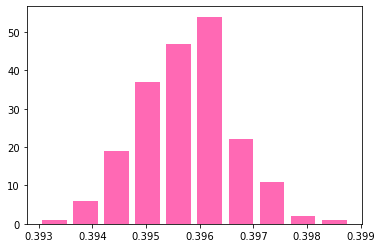

In [17]:
values = str_average_distance(grid_size, grid_group, strata_ratio, 10000, 200)
plt.hist(values, bins=10, cumulative=False, histtype='bar', orientation='vertical', rwidth=0.8,color='hotpink')
plt.show()

In [18]:
res_str = list()
for n_samples in test_n_samples:
    values = str_average_distance(grid_size, grid_group, strata_ratio, n_samples, 200)
    var = variance_of_sample_means(values)
    res_str.append(var)

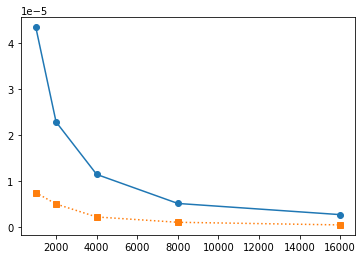

In [19]:
plt.plot( test_n_samples, res_srs, linestyle='-', marker='o')
plt.plot( test_n_samples, res_str, linestyle=':', marker='s')
plt.show()